In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression  
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler     
from sklearn.metrics import accuracy_score,precision_score,recall_score 

In [2]:
df=pd.read_csv("data (1).csv")

In [3]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.duplicated().sum()

0

In [6]:
df.drop(["Unnamed: 32", "id"], axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == "M" else 0)

<Axes: xlabel='diagnosis'>

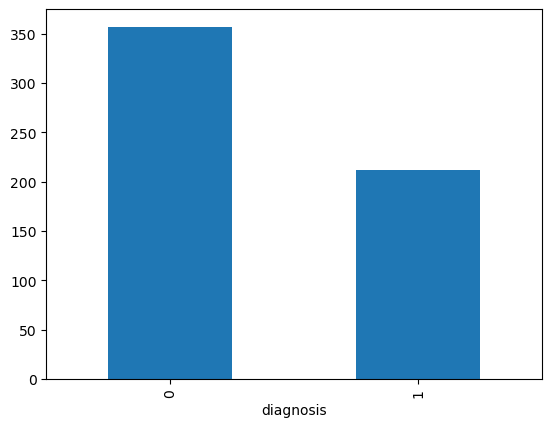

In [8]:
df['diagnosis'] = df['diagnosis'].astype(int)
df['diagnosis'].value_counts().plot(kind='bar')

In [9]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

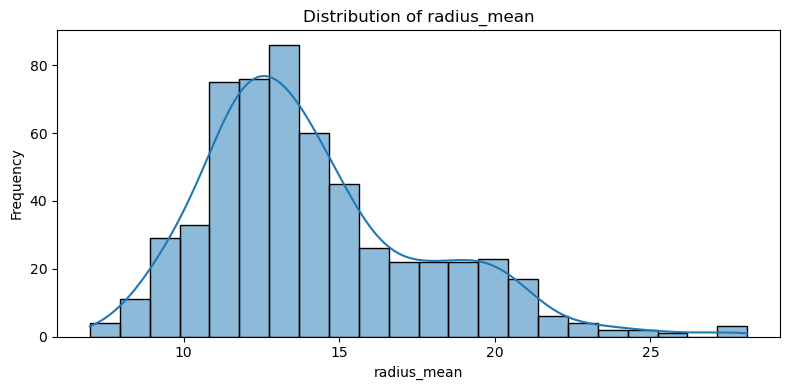

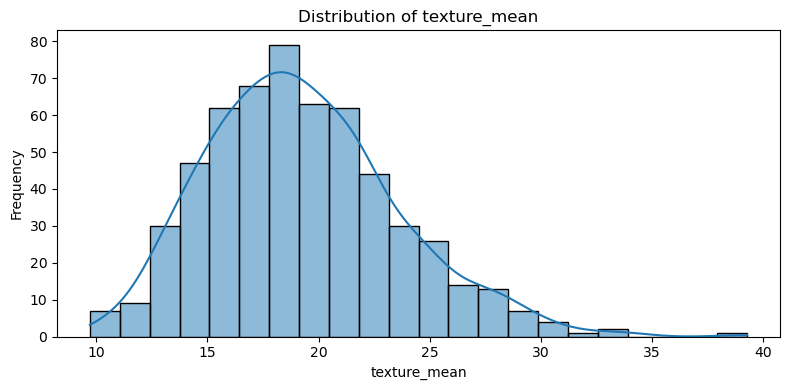

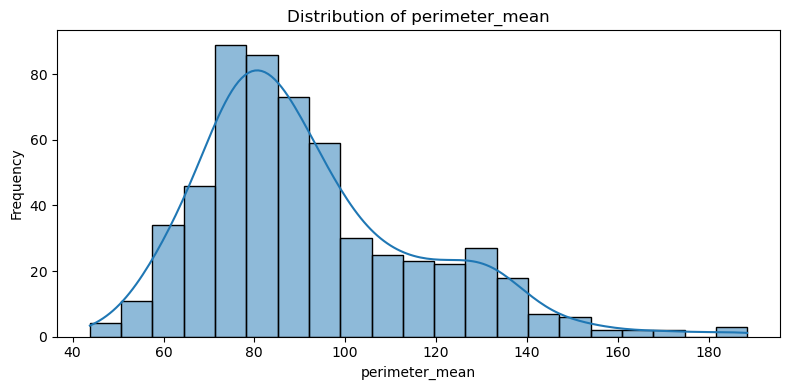

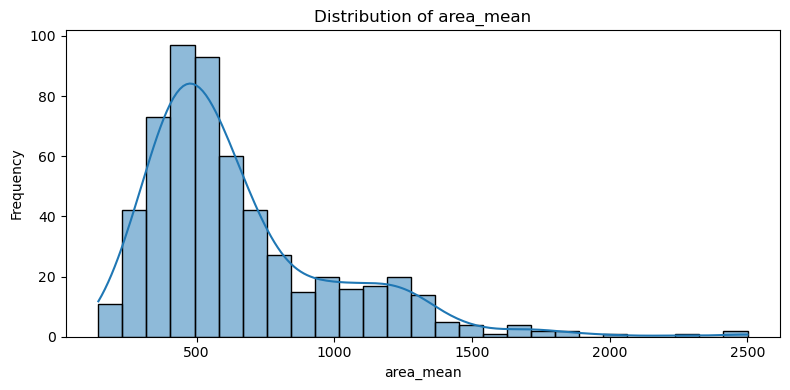

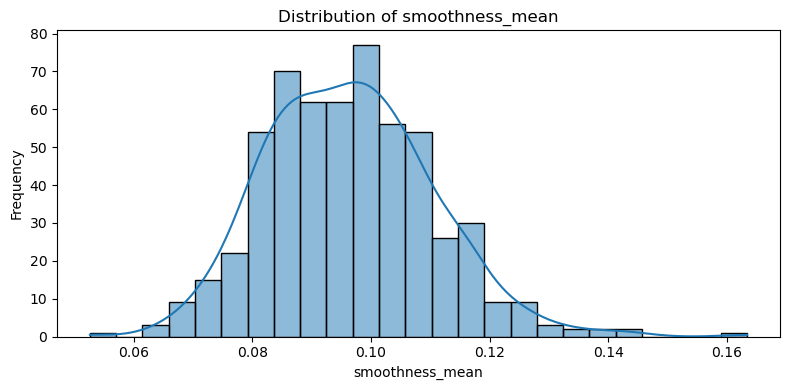

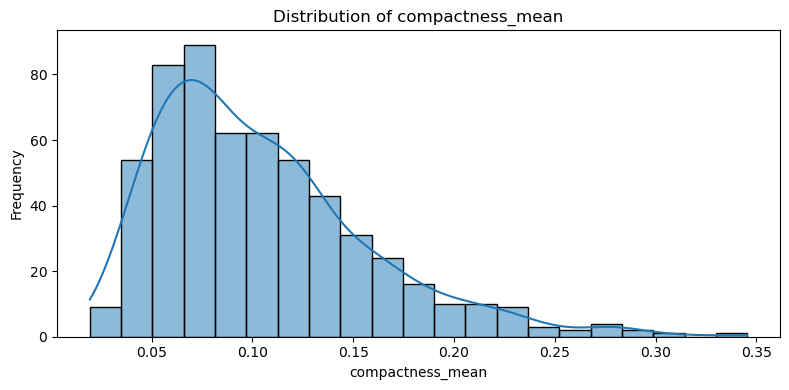

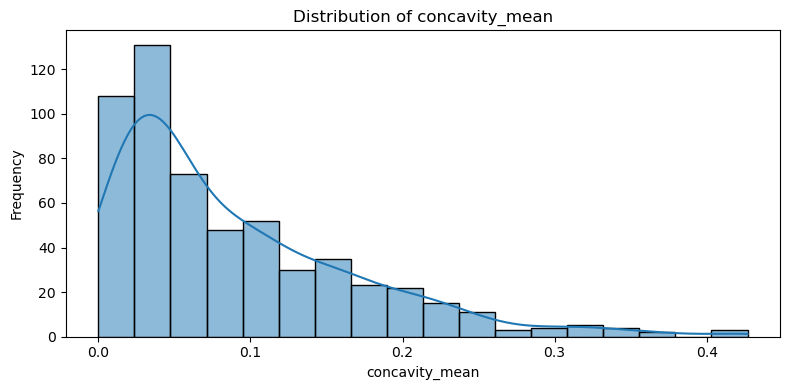

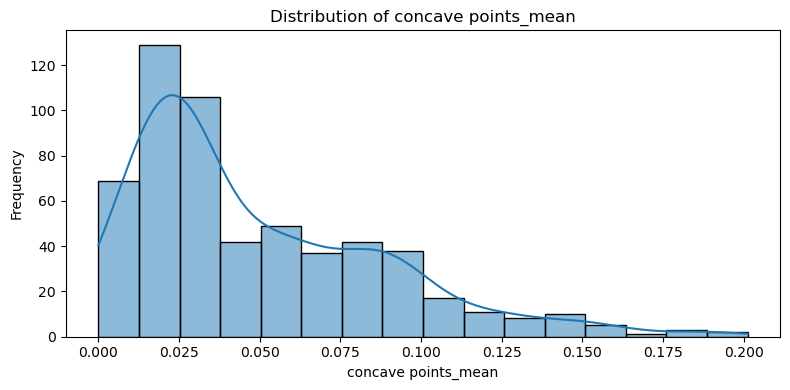

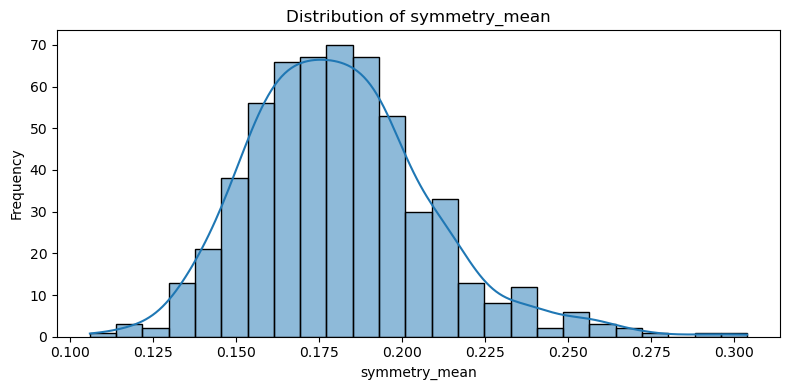

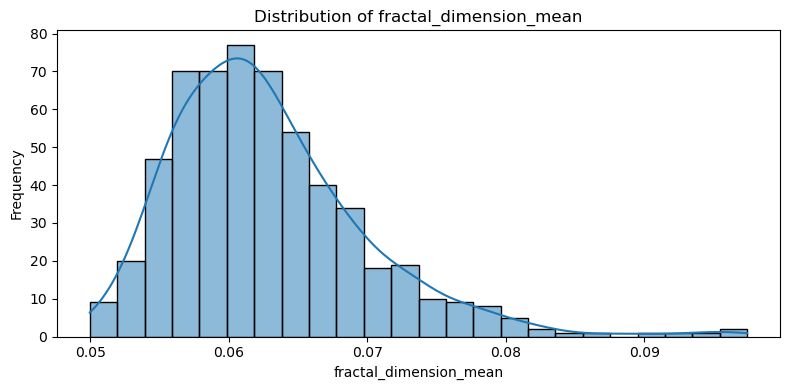

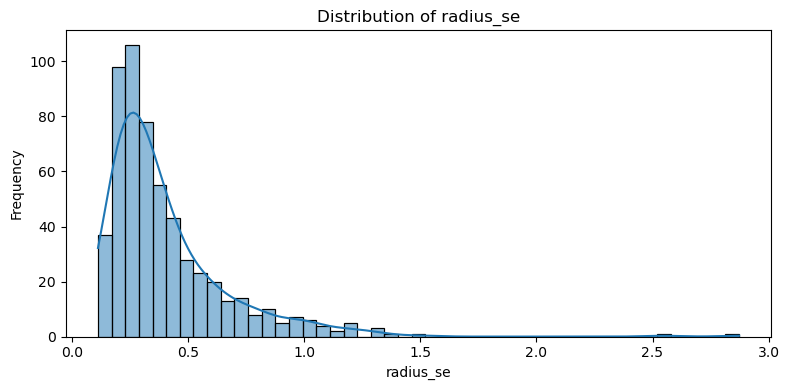

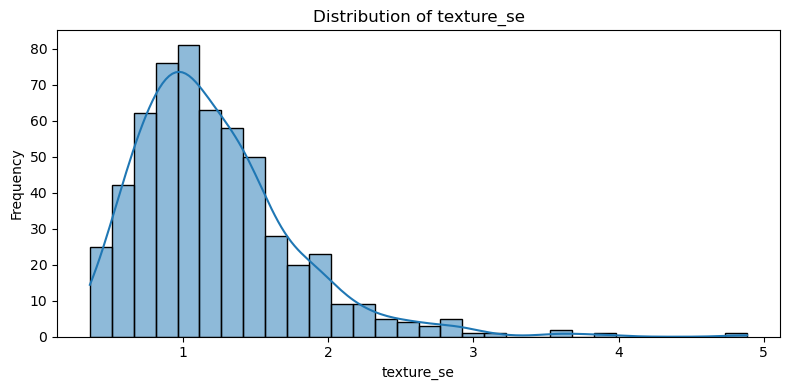

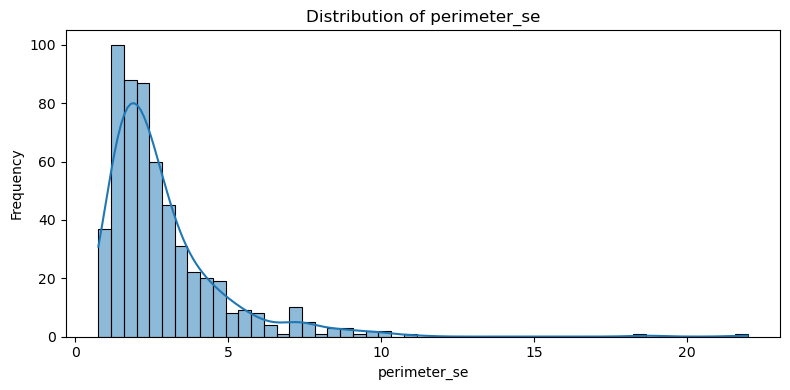

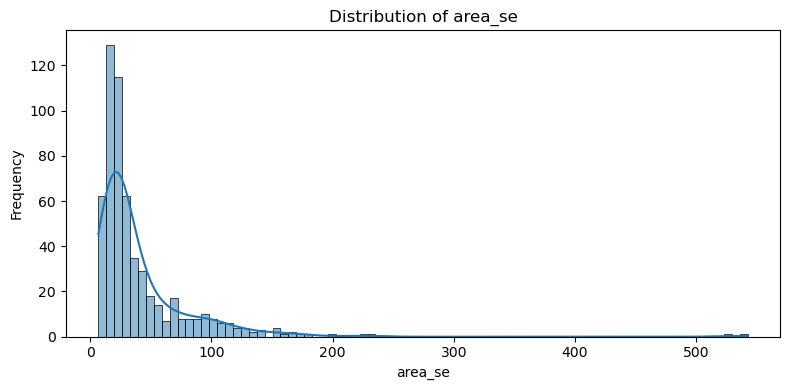

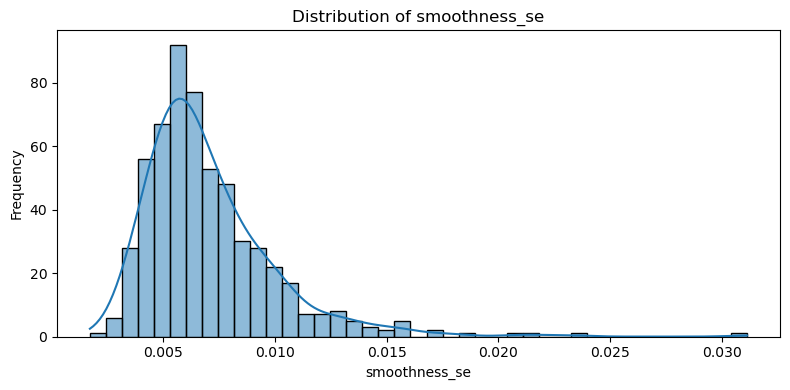

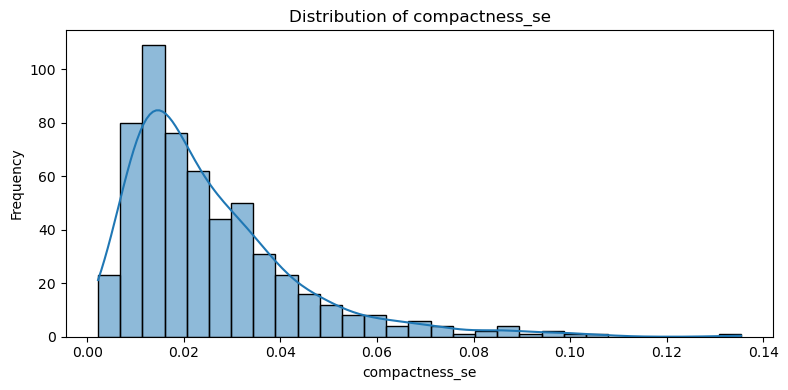

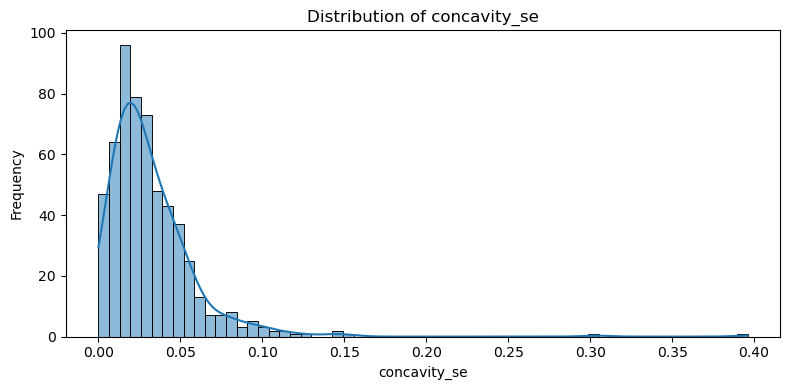

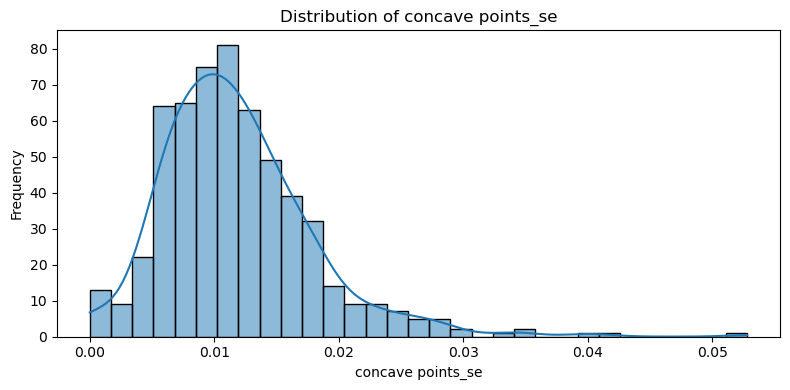

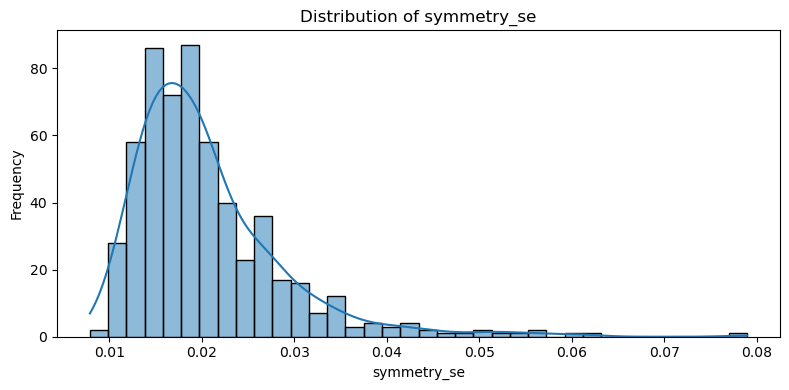

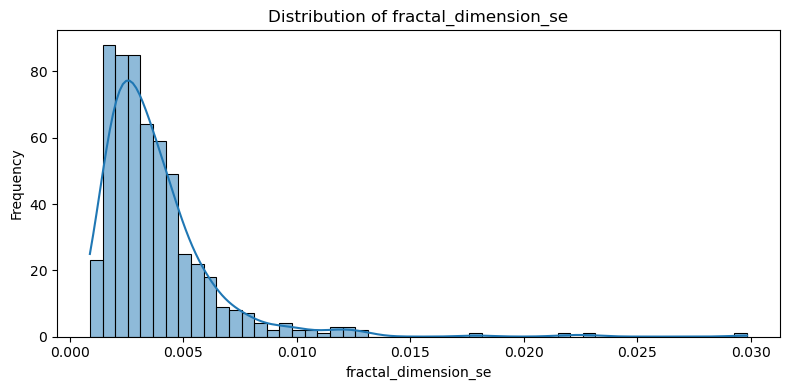

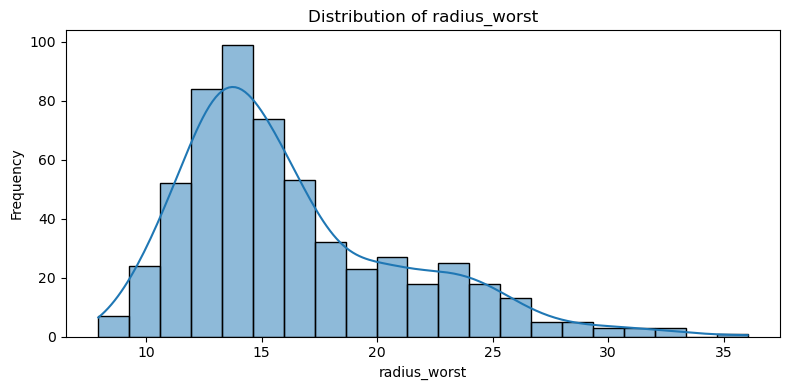

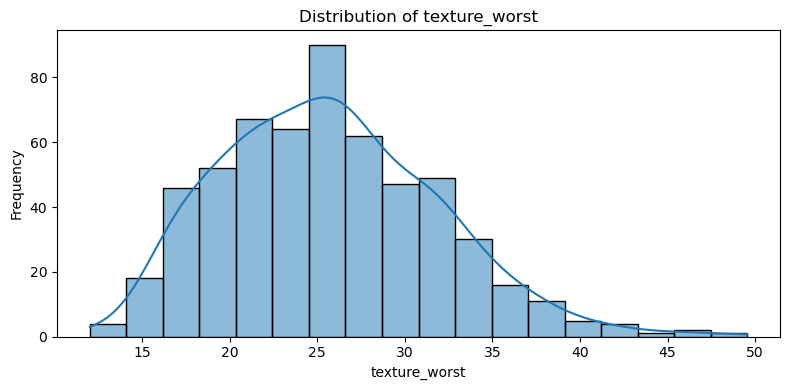

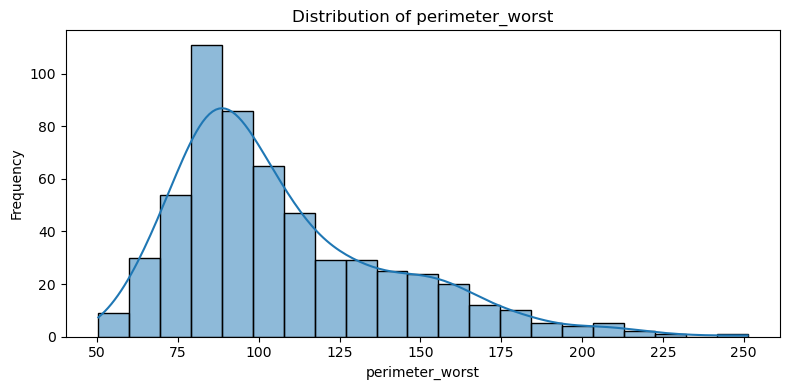

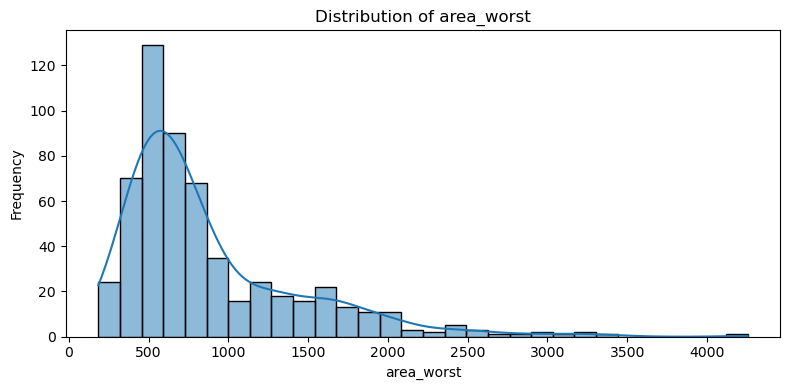

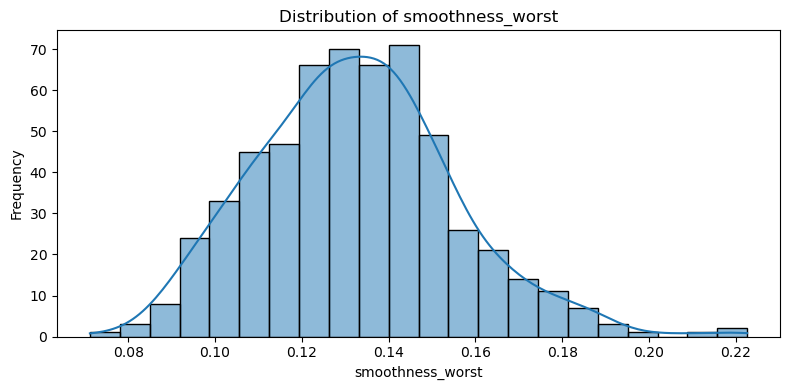

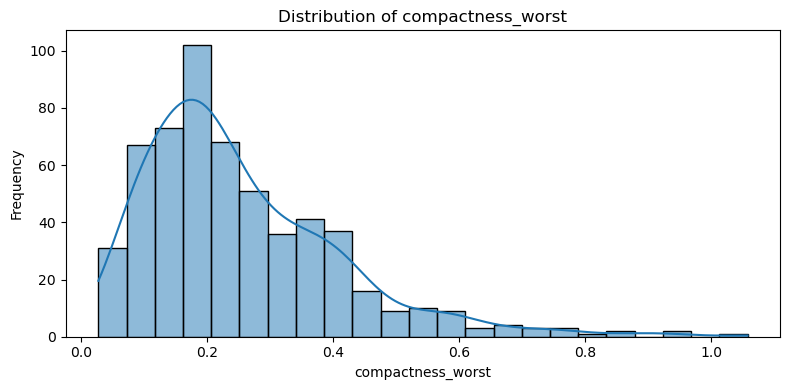

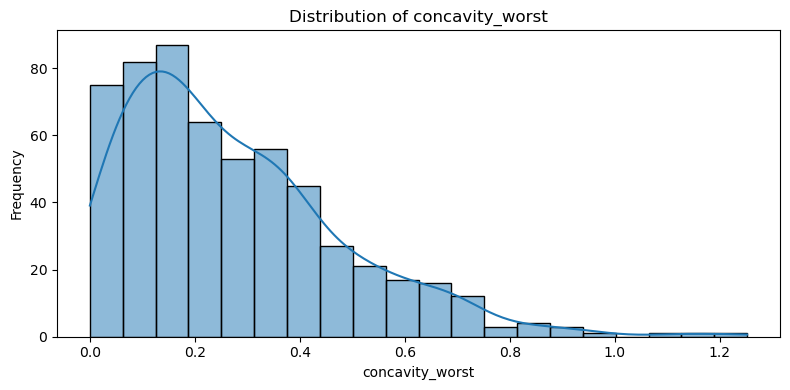

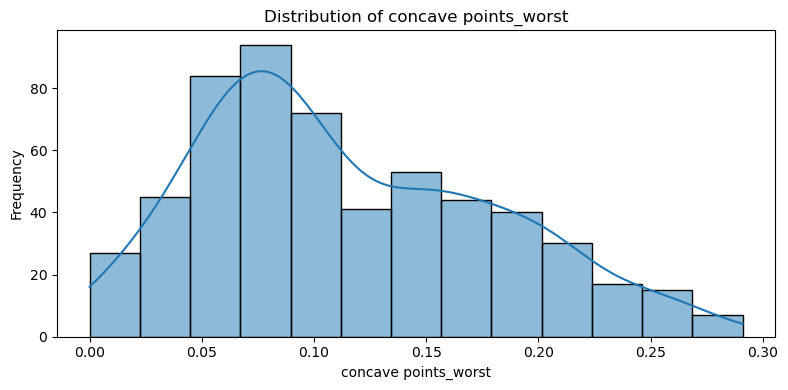

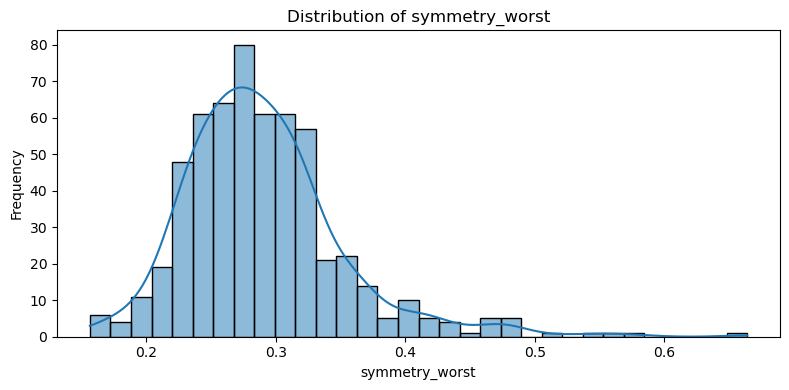

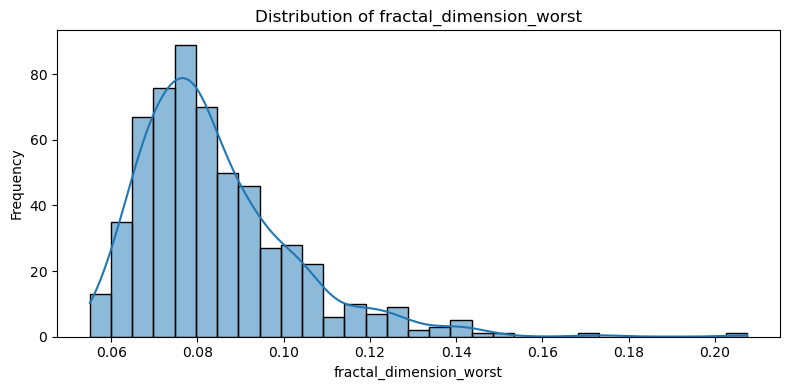

In [10]:
columns = [ 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

for col in columns:
    plt.figure(figsize=(8, 4))  # Create a new figure for each column
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show() 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int32  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [12]:
for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {outliers.shape[0]} outliers")
    

radius_mean: 14 outliers
texture_mean: 7 outliers
perimeter_mean: 13 outliers
area_mean: 25 outliers
smoothness_mean: 6 outliers
compactness_mean: 16 outliers
concavity_mean: 18 outliers
concave points_mean: 10 outliers
symmetry_mean: 15 outliers
fractal_dimension_mean: 15 outliers
radius_se: 38 outliers
texture_se: 20 outliers
perimeter_se: 38 outliers
area_se: 65 outliers
smoothness_se: 30 outliers
compactness_se: 28 outliers
concavity_se: 22 outliers
concave points_se: 19 outliers
symmetry_se: 27 outliers
fractal_dimension_se: 28 outliers
radius_worst: 17 outliers
texture_worst: 5 outliers
perimeter_worst: 15 outliers
area_worst: 35 outliers
smoothness_worst: 7 outliers
compactness_worst: 16 outliers
concavity_worst: 12 outliers
concave points_worst: 0 outliers
symmetry_worst: 23 outliers
fractal_dimension_worst: 24 outliers


In [13]:
for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

In [14]:
for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {outliers.shape[0]} outliers")
    

radius_mean: 0 outliers
texture_mean: 0 outliers
perimeter_mean: 0 outliers
area_mean: 0 outliers
smoothness_mean: 0 outliers
compactness_mean: 0 outliers
concavity_mean: 0 outliers
concave points_mean: 0 outliers
symmetry_mean: 0 outliers
fractal_dimension_mean: 0 outliers
radius_se: 0 outliers
texture_se: 0 outliers
perimeter_se: 0 outliers
area_se: 0 outliers
smoothness_se: 0 outliers
compactness_se: 0 outliers
concavity_se: 0 outliers
concave points_se: 0 outliers
symmetry_se: 0 outliers
fractal_dimension_se: 0 outliers
radius_worst: 0 outliers
texture_worst: 0 outliers
perimeter_worst: 0 outliers
area_worst: 0 outliers
smoothness_worst: 0 outliers
compactness_worst: 0 outliers
concavity_worst: 0 outliers
concave points_worst: 0 outliers
symmetry_worst: 0 outliers
fractal_dimension_worst: 0 outliers


In [15]:
df['diagnosis'] = df['diagnosis'].astype(int)


In [16]:

X = df.drop("diagnosis", axis=1)
Y = df['diagnosis']

In [17]:
standardization=StandardScaler()
X_Scaler=standardization.fit_transform(X)

In [18]:
X_Scaler

array([[ 1.17679966, -2.12119955,  1.35737491, ...,  2.29607613,
         2.44391811,  2.2252465 ],
       [ 1.94992874, -0.35487501,  1.79599128, ...,  1.0870843 ,
        -0.2344085 ,  0.35531394],
       [ 1.6862258 ,  0.47689893,  1.67005192, ...,  1.95500035,
         1.36905724,  0.2651967 ],
       ...,
       [ 0.76026888,  2.10937479,  0.72767814, ...,  0.41406869,
        -1.22287173, -0.32181693],
       [ 1.95891861,  2.40814417,  2.10866829, ...,  2.28998549,
         2.24975568,  2.48245611],
       [-1.88874705,  1.26325992, -1.89446607, ..., -1.74506282,
        -0.00958885, -0.81057776]])

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(X_Scaler,Y,test_size=0.3,random_state=42)

In [20]:
print(Y_train.dtypes) 
print(Y_train.unique()) 

int32
[0 1]


In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)

Y_pred = lr.predict(X_test)

In [22]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,0.2419,...,25.380,17.33,184.60,1937.05,0.16220,0.62695,0.7119,0.2654,0.41915,0.11890
1,1,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1937.05,0.12380,0.18660,0.2416,0.1860,0.27500,0.08902
2,1,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.00,0.14440,0.42450,0.4504,0.2430,0.36130,0.08758
3,1,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,0.2464,...,14.910,26.50,98.87,567.70,0.19010,0.62695,0.6869,0.2575,0.41915,0.12301
4,1,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.00,0.13740,0.20500,0.4000,0.1625,0.23640,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1326.3,0.111000,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,1937.05,0.14100,0.21130,0.4107,0.2216,0.20600,0.07115
565,1,20.13,28.25,131.20,1261.0,0.097800,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.00,0.11660,0.19220,0.3215,0.1628,0.25720,0.06637
566,1,16.60,28.08,108.30,858.1,0.084550,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.00,0.11390,0.30940,0.3403,0.1418,0.22180,0.07820
567,1,20.60,29.33,140.10,1265.0,0.117800,0.22862,0.28241,0.15200,0.2397,...,25.740,39.42,184.60,1821.00,0.16500,0.62695,0.7855,0.2650,0.40870,0.12301


In [23]:
print(df['diagnosis'].unique())


[1 0]


In [24]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix


accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)


print(f"Accuracy Score : {accuracy}")
print(f"Precision Score: {precision}")
print(f"Recall Score   : {recall}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy Score : 0.9941520467836257
Precision Score: 1.0
Recall Score   : 0.9841269841269841
Confusion Matrix:
[[108   0]
 [  1  62]]
